Considering the problem of throwing dice multiple times and calculating the resulting probability distribution.

Plot the distribution function of a dice $x=(1,\dots,6)$. The probability mass function is given by $p(x)=1/6$ for $x=1,\dots,6$. Using a random number generator, we can simulate the dice roll and plot the distribution function and compare it with the theoretical distribution function which is a uniform distribution.

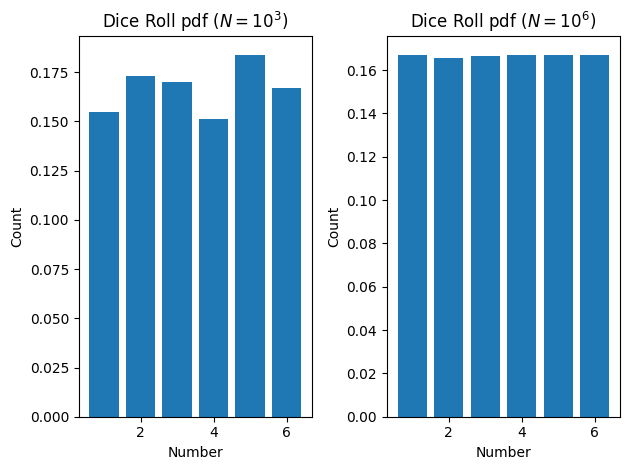

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

Niter = 1000 # Number of random numbers to generate

# Generate N random numbers from 1 to 6
dice_rolls = [random.randint(1, 6) for _ in range(Niter)]

# Count the occurrences of each number
counts = [dice_rolls.count(i) for i in range(1, 7)]

counts = np.array(counts)/Niter

# Plot the results
plt.subplot(1, 2, 1)
plt.bar(range(1, 7), counts)
plt.xlabel(r'Number')
plt.ylabel(r'Count')
plt.title(r'Dice Roll pdf $(N=10^3)$')

Niter = 1000000

# Generate N random numbers from 1 to 6
dice_rolls = [random.randint(1, 6) for _ in range(Niter)]

# Count the occurrences of each number
counts = [dice_rolls.count(i) for i in range(1, 7)]

counts = np.array(counts)/Niter

# Plot the results
plt.subplot(1, 2, 2)
plt.bar(range(1, 7), counts)
plt.xlabel(r'Number')
plt.ylabel(r'Count')
plt.title(r'Dice Roll pdf $(N=10^6)$')


plt.tight_layout()
plt.show()


We can see that by increasing the number of dice rolls, the distribution function converges to the theoretical distribution function.

Consider the case in which the random event consist of throwing a dice twice $N_{dice}=2$ and calculating the average value as: $$x=\frac{rand(6)+rand(6)}{2}$$

Calculate the probability mass function of the outcome $x=(1,1.5,2,\dots,6)$ and show it in the figure

 1.0  28071  0.02807
 1.5  55948  0.05595
 2.0  83611  0.08361
 2.5  110913  0.11091
 3.0  138851  0.13885
 3.5  166512  0.16651
 4.0  138332  0.13833
 4.5  111002  0.11100
 5.0  83762  0.08376
 5.5  55240  0.05524
 6.0  27758  0.02776


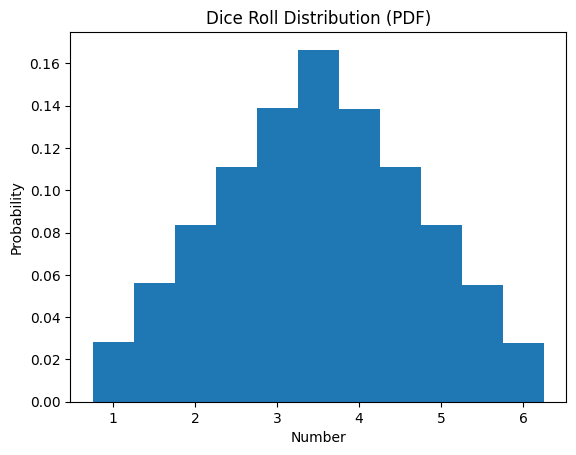

In [15]:
Niter = 1000000

# Define the array to store the dice outcomes
dice_outcome = np.zeros(Niter)

for i in range(Niter):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    dice_outcome[i] = (a + b) / 2

# Define the bin edges
bin_edges = np.arange(1, 7, 0.5)

# Count the occurrences of each value
counts, _ = np.histogram(dice_outcome, bins=bin_edges)

# Normalize the counts as a discrete probability density function (PDF)
pdf = counts / Niter

# Print the counts and PDF
for value, counts, p in zip(bin_edges[:-1], counts, pdf):
    print(f'{value: .1f} {counts: 6d} {p: .5f}')

# Plot the normalized PDF
plt.bar(bin_edges[:-1], pdf, width=0.5)
plt.xlabel(r'Number')
plt.ylabel(r'Probability')
plt.title(r'Dice Roll Distribution (PDF)')
plt.show()

Consider the case when one random event consists of a throwing a dice $N$ times and calculating the average value $$x=\frac{\sum_{i=1}^N{rand(6)}}{N}$$ Calculate the probability distribution $p(x)$ and assume that for large $N$ the spacing $dx=1/N$ is small enough to consider the distribution as a continuous distribution. Then use continuos variable convention to normalize the pdf $$\int{p(x)dx}=1$$ Compare the obtained result with the prediction of the central limit theorem $$g(x)=\frac{1}{\sqrt{2\pi\sigma'^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma'^2}\right)$$ where the reduce variance is given by $\sigma'=\sigma/\sqrt{N}$ and the mean value is $\mu=3.5$. Find a large enough value of $N$ such that the Central Limit Theorem is a good approximation of the distribution function.

 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  0.00000
 1.0      0  

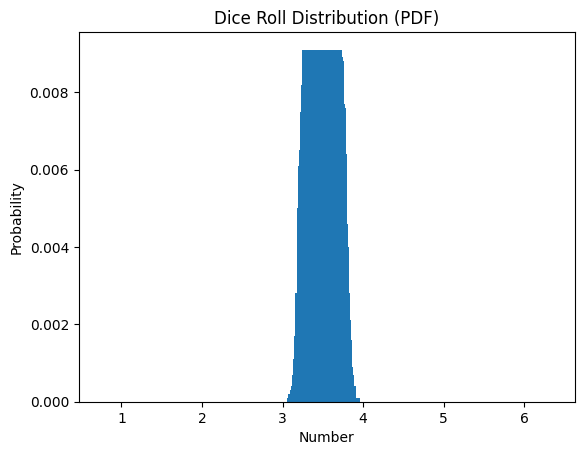

In [22]:
N = 10000

W = 1000

# Define the array to store the dice outcomes
dice_outcome = np.zeros(N)
dice_rolls = np.zeros(W)

for i in range(N):
    for j in range(W):
        dice_rolls[j] = random.randint(1, 6)
    dice_outcome[i] = np.mean(dice_rolls)

# Define the bin edges
bin_edges = np.arange(1, 6.1, 1/W)

# Count the occurrences of each value
counts, _ = np.histogram(dice_outcome, bins=bin_edges)

# Normalize the counts as a discrete probability density function (PDF)
pdf = counts / N

# Print the counts and PDF
for value, counts, p in zip(bin_edges[:-1], counts, pdf):
    print(f'{value: .1f} {counts: 6d} {p: .5f}')

# Plot the normalized PDF
plt.bar(bin_edges[:-1], pdf, width=0.5)
plt.xlabel(r'Number')
plt.ylabel(r'Probability')
plt.title(r'Dice Roll Distribution (PDF)')
plt.show()

We wanna now estimate the statistical error associated with such estimation assuming a single dice throwing is used to estimate the mean value $$\mu=\lang x\rang\approx\frac{\sum_{i=1}^Nx_i}{N}$$ and the variance $$\sigma^2=\lang x^2\rang-\lang x\rang^2\approx\frac{\sum_{i=1}^Nx_i^2}{N}-\left(\frac{\sum_{i=1}^Nx_i}{N}\right)^2$$

Calculate the mean value by throwing the dice $N=100$ and $N=1000$ times and calculate the variance. Compare the result with the theoretical exact value given by $\mu=3.5$ and $\sigma^2=35/12\approx2.92$

Finally, we wanna estimate the statistical error associated with the estimation of the mean value and the variance. We can use the standard deviation of the mean value and the standard deviation of the variance. The standard deviation of the mean value is given by $$\sigma_{\mu}=\sqrt{\frac{\sigma^2}{N}}$$ and the standard deviation of the variance is given by $$\sigma_{\sigma^2}=\sqrt{\frac{2\sigma^4}{N}}$$

In [53]:
Niter = 10

# Generate N random numbers from 1 to 6
dice_rolls = np.array([random.randint(1, 6) for _ in range(Niter)])

# Calculate the variance
variance = np.var(dice_rolls)  #var = np.sum(dice_rolls**2)/Niter-np.mean(dice_rolls)**2

# Print the variance
print(f'Variance  (N=10): {variance:.10f}')

Niter = 100

# Generate N random numbers from 1 to 6
dice_rolls = np.array([random.randint(1, 6) for _ in range(Niter)])

# Calculate the variance
variance = np.var(dice_rolls)  #var = np.sum(dice_rolls**2)/Niter-np.mean(dice_rolls)**2

# Print the variance
print(f'Variance (N=100): {variance:.10f}')

Niter = 10000

# Generate N random numbers from 1 to 6
dice_rolls = np.array([random.randint(1, 6) for _ in range(Niter)])

# Calculate the variance
variance = np.var(dice_rolls)  #var = np.sum(dice_rolls**2)/Niter-np.mean(dice_rolls)**2

# Print the variance
print(f'Variance (N=10000): {variance:.10f}')

Variance  (N=10): 4.6400000000
Variance (N=100): 2.5800000000
Variance (N=10000): 2.9161483900
